
--- Epoca: 1 ---
_Iteracion:  1 _
Entrada: [0 0]
z1: 0.3000, a1: 0.3000
z2: 0.1500, a2: 0.1500
y: 0.7250
Pesos actualizados:
w11: 0.0500, w21: 0.2000, b1: -0.1313
w12: 0.1000, w22: 0.2000, b2: -0.2812
v1: 0.2413, v2: 0.3706, b3: -0.3625
_Iteracion:  2 _
Entrada: [0 1]
z1: 0.0687, a1: 0.0687
z2: -0.0812, a2: -0.0000
y: -0.3459
Pesos actualizados:
w11: 0.0500, w21: 0.3624, b1: 0.0311
w12: 0.1000, w22: 0.2000, b2: -0.2812
v1: 0.2875, v2: 0.3706, b3: 0.3105
_Iteracion:  3 _
Entrada: [1 0]
z1: 0.0811, a1: 0.0811
z2: -0.1812, a2: -0.0000
y: 0.3338
Acierto - No se actualizan pesos
_Iteracion:  4 _
Entrada: [1 1]
z1: 0.4435, a1: 0.4435
z2: 0.0188, a2: 0.0188
y: 0.4449
Pesos actualizados:
w11: -0.1577, w21: 0.1546, b1: -0.1766
w12: -0.1678, w22: -0.0678, b2: -0.5490
v1: -0.0329, v2: 0.3571, b3: -0.4120
_Iteracion:  5 _
Entrada: [2 2]
z1: -0.1828, a1: -0.0000
z2: -1.0200, a2: -0.0000
y: -0.4120
Pesos actualizados:
w11: -0.1577, w21: 0.1546, b1: -0.1766
w12: -0.1678, w22: -0.0678, b2: -0.5490
v1

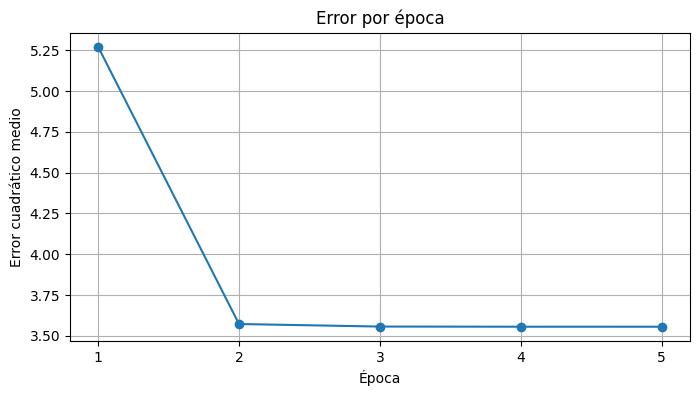

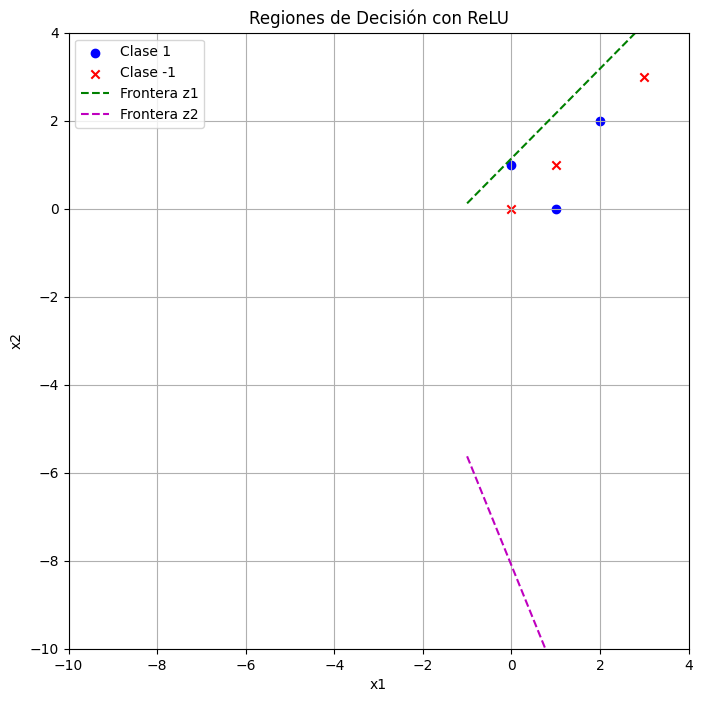

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (compuerta XOR modificada)
individuo = np.array([[0, 0],      # Clase -1 (False)
                      [0, 1],      # Clase -1 (False)
                      [1, 0],      # Clase -1 (False)
                      [1, 1],      # Clase 1 (True)
                      [2, 2],      # Clase 1 (True)
                      [3, 3]])     # Clase 1 (True)
                      
clases = np.array([-1, 1, 1, -1, 1, -1])

# Función ReLU y su derivada (implementadas manualmente)
def relu(x):
    return x * (x > 0)  # Equivalente a max(0, x)

def relu_derivada(x):
    return 1 * (x > 0)  # 1 si x > 0, 0 en otro caso

# Parámetros iniciales (los mismos que en el original)
w = np.array([[0.05, 0.1], 
              [0.2,  0.2]])
v = np.array([[0.5], 
              [0.5]])
b1 = 0.3
b2 = 0.15
b3 = 0.5
pa = 0.5  # Tasa de aprendizaje
numEpocas = 5

# Variables para el entrenamiento
epocas = 0
sumaErrores = 0
error = []
aciertos = []

# Entrenamiento
while epocas != numEpocas:   
    print("\n--- Epoca:", epocas+1, "---")
    for i in range(individuo.shape[0]):
        print("_Iteracion: ", i + 1,"_")
        print("Entrada:", individuo[i])
        
        # Forward pass
        z1 = w[0,0] * individuo[i, 0] + w[1, 0] * individuo[i, 1] + b1
        z2 = w[0, 1] * individuo[i, 0] + w[1, 1] * individuo[i, 1] + b2
        
        a1 = relu(z1)  # Activación ReLU
        a2 = relu(z2)
        
        y = a1 * v[0, 0] + a2 * v[1, 0] + b3  # Salida final
        
        print(f"z1: {z1:.4f}, a1: {a1:.4f}")
        print(f"z2: {z2:.4f}, a2: {a2:.4f}")
        print(f"y: {y:.4f}")
        
        # Predicción (umbral 0 para clases -1 y 1)
        prediccion = 1 if y >= 0 else -1
        
        if prediccion == clases[i]:
            print("Acierto - No se actualizan pesos")
        else:
            # Cálculo del error (error cuadrático medio)
            error_iteracion = (clases[i] - y)**2 / 2
            sumaErrores += error_iteracion
            
            # Backpropagation
            delta_y = clases[i] - y
            
            # Gradientes para la capa de salida
            grad_v1 = delta_y * a1
            grad_v2 = delta_y * a2
            grad_b3 = delta_y
            
            # Gradientes para la capa oculta
            delta_z1 = delta_y * v[0, 0] * relu_derivada(z1)
            delta_z2 = delta_y * v[1, 0] * relu_derivada(z2)
            
            # Actualización de pesos
            w[0, 0] += pa * delta_z1 * individuo[i, 0]
            w[1, 0] += pa * delta_z1 * individuo[i, 1]
            b1 += pa * delta_z1
            
            w[0, 1] += pa * delta_z2 * individuo[i, 0]
            w[1, 1] += pa * delta_z2 * individuo[i, 1]
            b2 += pa * delta_z2
            
            v[0, 0] += pa * grad_v1
            v[1, 0] += pa * grad_v2
            b3 += pa * grad_b3
            
            print("Pesos actualizados:")
            print(f"w11: {w[0,0]:.4f}, w21: {w[1,0]:.4f}, b1: {b1:.4f}")
            print(f"w12: {w[0,1]:.4f}, w22: {w[1,1]:.4f}, b2: {b2:.4f}")
            print(f"v1: {v[0,0]:.4f}, v2: {v[1,0]:.4f}, b3: {b3:.4f}")

    # Final de época
    epocas += 1
    error.append(sumaErrores)
    print(f"Fin época {epocas}, Error acumulado: {sumaErrores:.4f}")
    sumaErrores = 0

# Gráfica del error
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(error)+1), error, 'o-')
plt.title("Error por época")
plt.xlabel("Época")
plt.ylabel("Error cuadrático medio")
plt.grid(True)
plt.xticks(range(1, len(error)+1))
plt.show()

# Visualización de las regiones de decisión
def recta_decision(x1, pesos, bias):
    """Calcula x2 para la recta de decisión"""
    return (-pesos[0] * x1 - bias) / pesos[1]

x1_range = np.linspace(-1, 4, 100)
x2_z1 = recta_decision(x1_range, w[:,0], b1)
x2_z2 = recta_decision(x1_range, w[:,1], b2)

plt.figure(figsize=(8, 8))
plt.scatter(individuo[clases==1, 0], individuo[clases==1, 1], c='blue', label='Clase 1')
plt.scatter(individuo[clases==-1, 0], individuo[clases==-1, 1], marker='x', c='red', label='Clase -1')
plt.plot(x1_range, x2_z1, 'g--', label='Frontera z1')
plt.plot(x1_range, x2_z2, 'm--', label='Frontera z2')

plt.xlim(-10, 4)
plt.ylim(-10, 4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Regiones de Decisión con ReLU")
plt.legend()
plt.grid(True)
plt.show()